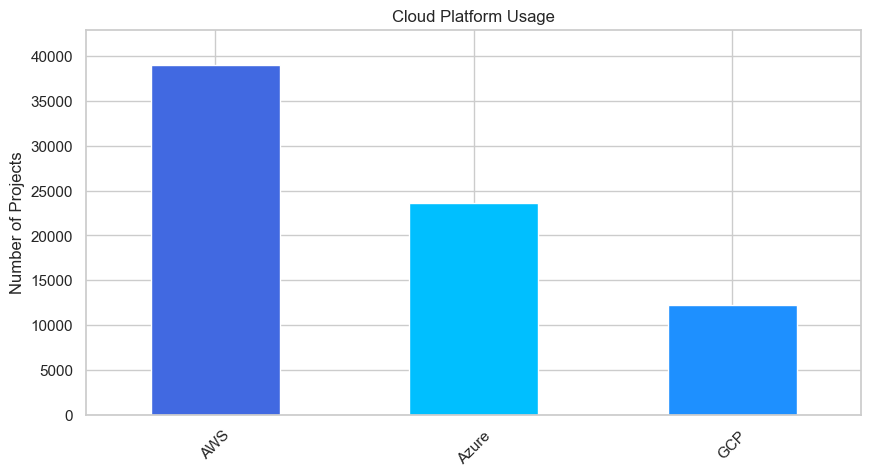

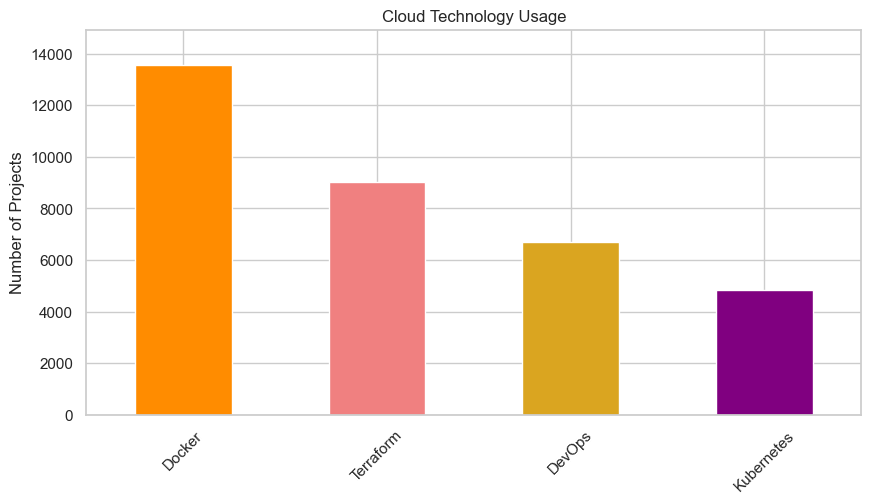

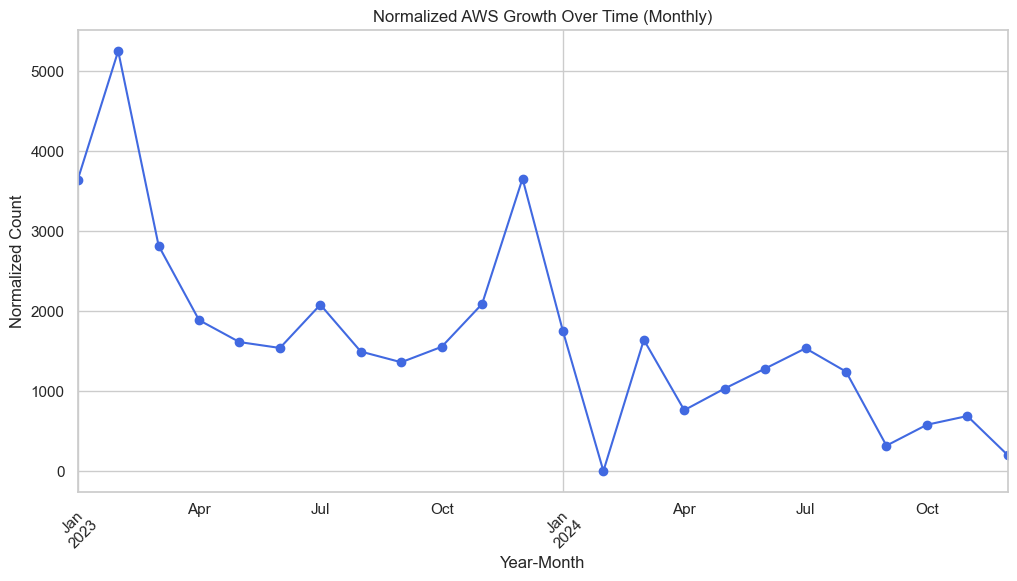

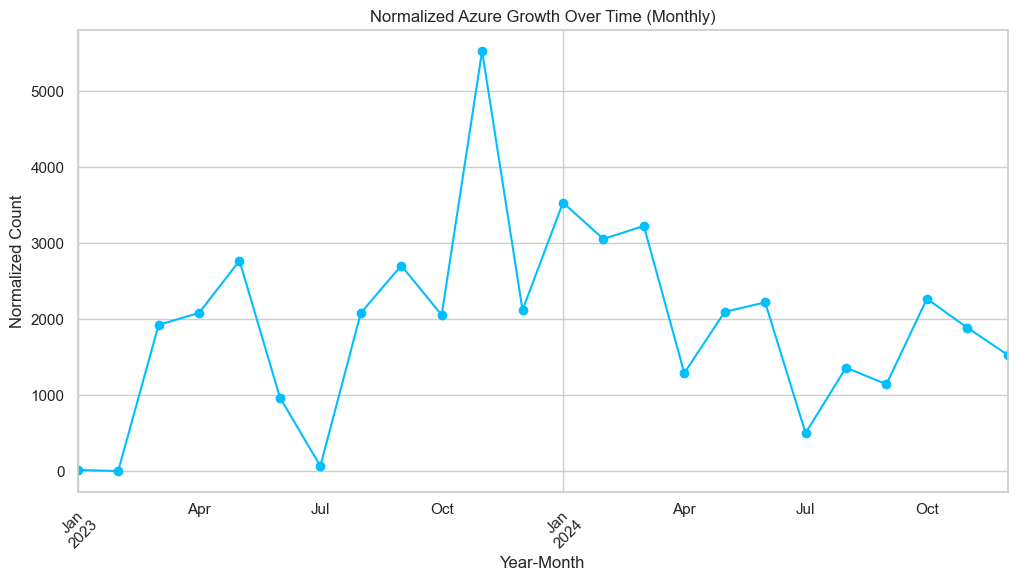

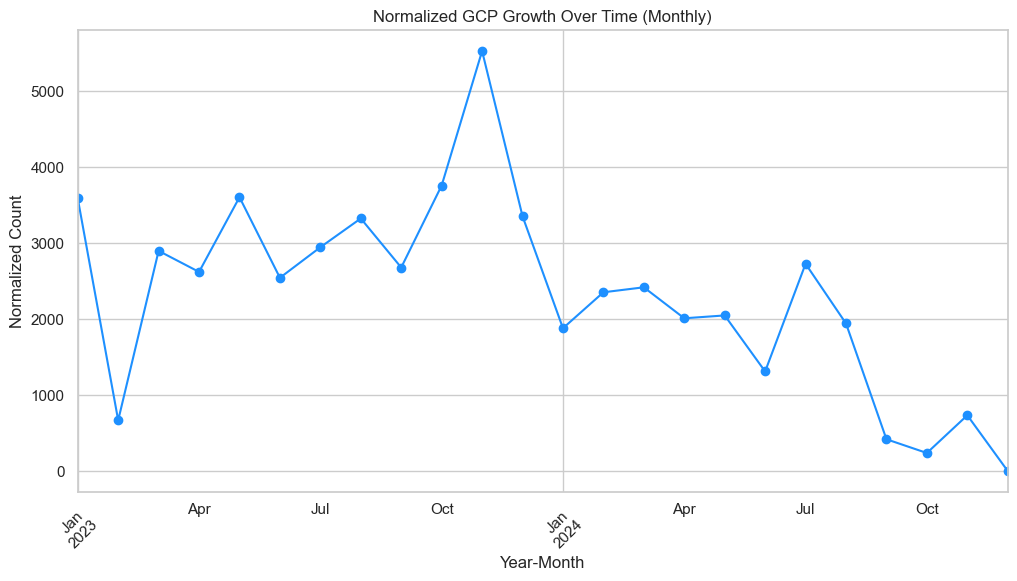

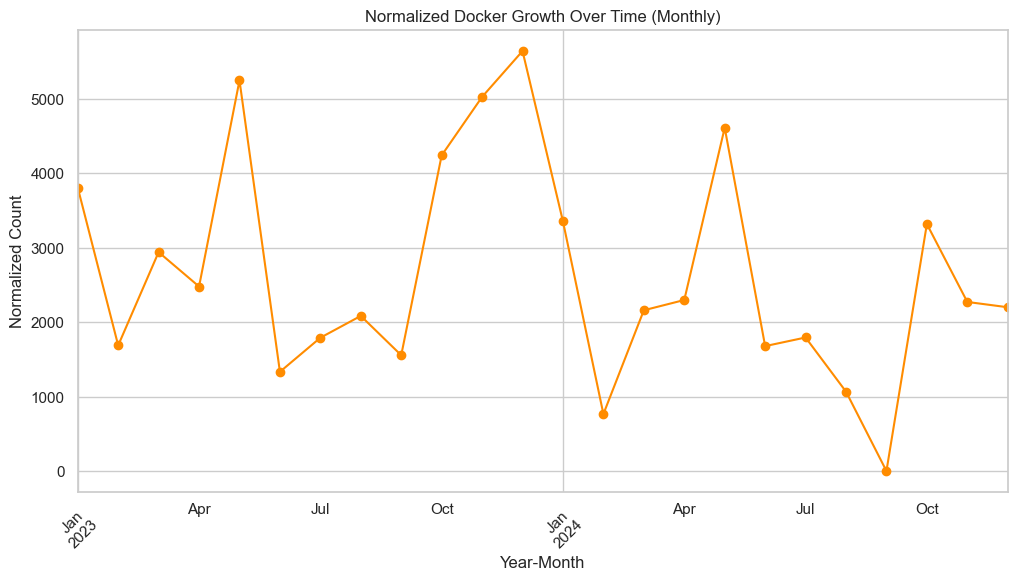

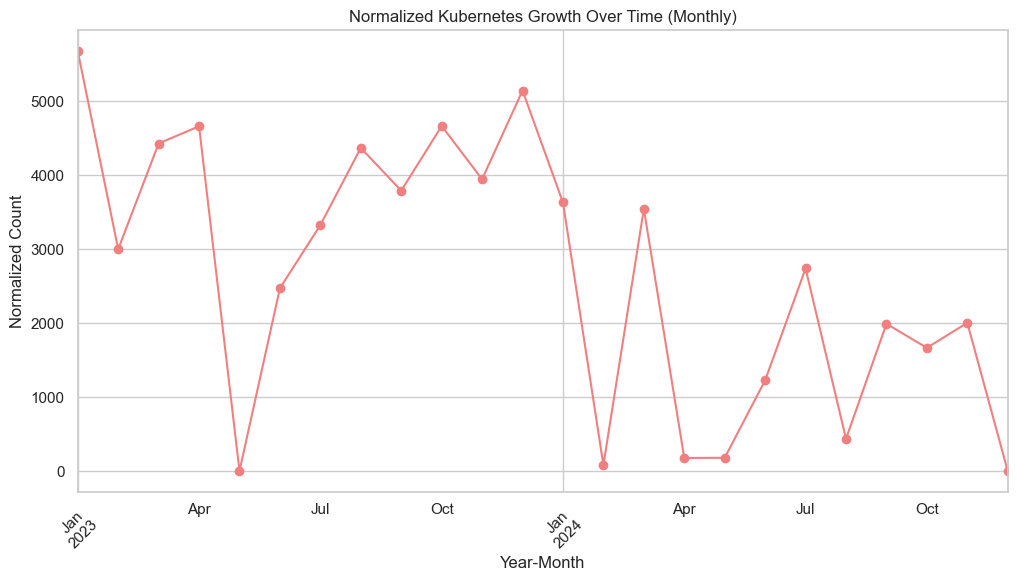

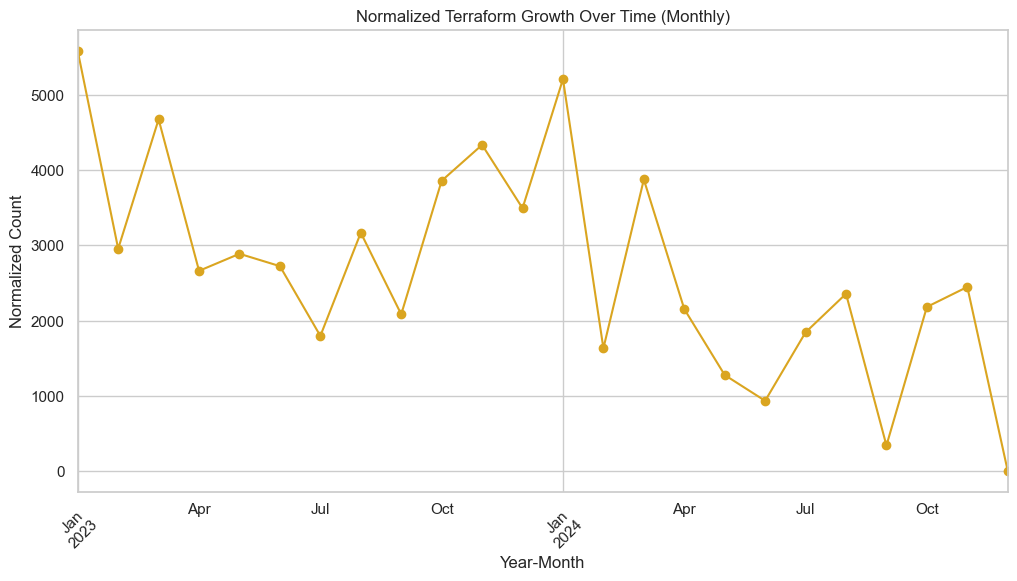

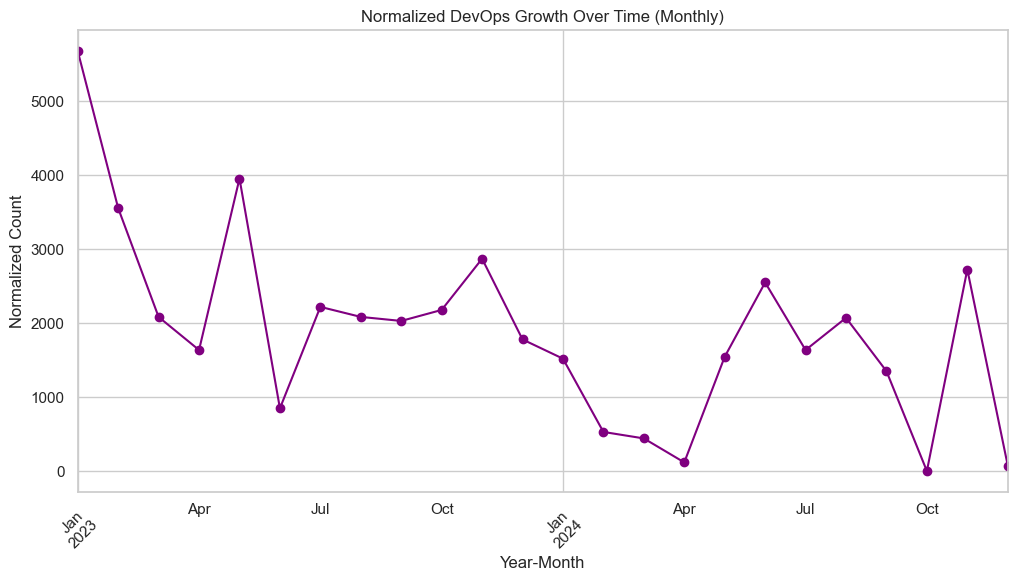

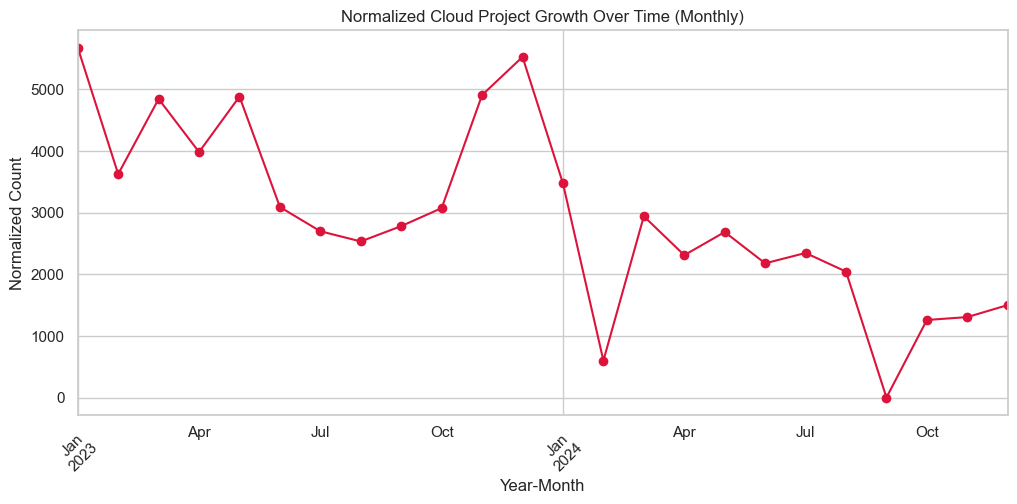

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv("github_repos_feature_engineered.csv")

# Convert year and month into a datetime format for proper trend visualization
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))  # YYYY-MM format

# Cloud platforms & technologies
cloud_platforms = ['AWS', 'Azure', 'GCP']
technologies = ['Docker', 'Kubernetes', 'Terraform', 'DevOps']

# Normalize overall project counts using Min-Max Scaling (0 to 1)
scaler = MinMaxScaler()
df['normalized_projects'] = scaler.fit_transform(df.groupby('year_month')['id'].transform('count').values.reshape(-1, 1))

# Normalize cloud platform trends using Min-Max Scaling
for platform in cloud_platforms:
    df[f'normalized_{platform}'] = scaler.fit_transform(df.groupby('year_month')[platform].transform('sum').values.reshape(-1, 1))

# Normalize cloud technology trends using Min-Max Scaling
for tech in technologies:
    df[f'normalized_{tech}'] = scaler.fit_transform(df.groupby('year_month')[tech].transform('sum').values.reshape(-1, 1))

# Set visualization style
sns.set(style="whitegrid")

# **Cloud Platforms Usage (Bar Chart)**
plt.figure(figsize=(10, 5))
df[cloud_platforms].sum().sort_values(ascending=False).plot(kind='bar', color=['royalblue', 'deepskyblue', 'dodgerblue'])
plt.title("Cloud Platform Usage")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.ylim(0, df[cloud_platforms].sum().max() * 1.1)
plt.show()

# **Cloud Technologies Usage (Bar Chart)**
plt.figure(figsize=(10, 5))
df[technologies].sum().sort_values(ascending=False).plot(kind='bar', color=['darkorange', 'lightcoral', 'goldenrod', 'purple'])
plt.title("Cloud Technology Usage")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45)
plt.ylim(0, df[technologies].sum().max() * 1.1)
plt.show()

# **Cloud Platforms Growth Over Time (Separate Line Charts)**
for platform, color in zip(cloud_platforms, ['royalblue', 'deepskyblue', 'dodgerblue']):
    plt.figure(figsize=(12, 6))
    df.groupby('year_month')[f'normalized_{platform}'].sum().plot(kind='line', marker='o', color=color)
    plt.title(f"Normalized {platform} Growth Over Time (Monthly)")
    plt.xlabel("Year-Month")
    plt.ylabel("Normalized Count")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# **Technologies Growth Over Time (Separate Line Charts)**
for tech, color in zip(technologies, ['darkorange', 'lightcoral', 'goldenrod', 'purple']):
    plt.figure(figsize=(12, 6))
    df.groupby('year_month')[f'normalized_{tech}'].sum().plot(kind='line', marker='o', color=color)
    plt.title(f"Normalized {tech} Growth Over Time (Monthly)")
    plt.xlabel("Year-Month")
    plt.ylabel("Normalized Count")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# **Cloud Project Growth Over Time (Normalized Monthly)**
plt.figure(figsize=(12, 5))
df.groupby('year_month')['normalized_projects'].sum().plot(kind='line', marker='o', color='crimson')

plt.title("Normalized Cloud Project Growth Over Time (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Normalized Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
